## Importación de librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt 
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Normalización
scaler_min_max = MinMaxScaler()

# Estandarización
scaler_standard = StandardScaler()

## Lectura de base de datos

In [4]:
df = pd.read_csv(r'C:\Users\EMMY\Desktop\Talento Tech\Proyecto\Limpieza\DataEVA.csv')

## Características en total del data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16354 non-null  int64  
 1   Codigo depto      16354 non-null  int64  
 2   Codigo mpio       16354 non-null  int64  
 3   Departamento      16354 non-null  object 
 4   SUBREGION         16354 non-null  object 
 5   Municipio         16354 non-null  object 
 6   Grupo cultivo     16354 non-null  object 
 7   Subgrupo cultivo  16354 non-null  object 
 8   Cultivo           16354 non-null  object 
 9   Año               16354 non-null  int64  
 10  Area sembrada     16354 non-null  float64
 11  Area cosechada    16354 non-null  float64
 12  Produccion        16354 non-null  float64
 13  Rendimiento       16354 non-null  float64
 14  Ciclo             16354 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 1.9+ MB


In [6]:
df.rename(columns={'Unnamed: 0':'Indice'}, inplace=True)


In [7]:
df[['Indice','Año','Codigo depto','Codigo mpio']] = df[['Indice','Año','Codigo depto','Codigo mpio']].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Indice            16354 non-null  category
 1   Codigo depto      16354 non-null  category
 2   Codigo mpio       16354 non-null  category
 3   Departamento      16354 non-null  object  
 4   SUBREGION         16354 non-null  object  
 5   Municipio         16354 non-null  object  
 6   Grupo cultivo     16354 non-null  object  
 7   Subgrupo cultivo  16354 non-null  object  
 8   Cultivo           16354 non-null  object  
 9   Año               16354 non-null  category
 10  Area sembrada     16354 non-null  float64 
 11  Area cosechada    16354 non-null  float64 
 12  Produccion        16354 non-null  float64 
 13  Rendimiento       16354 non-null  float64 
 14  Ciclo             16354 non-null  object  
dtypes: category(4), float64(4), object(7)
memory usage: 2.1+ MB


# TRATAR LOS DATOS FALTANTES

In [9]:
df.isna().sum()

Indice              0
Codigo depto        0
Codigo mpio         0
Departamento        0
SUBREGION           0
Municipio           0
Grupo cultivo       0
Subgrupo cultivo    0
Cultivo             0
Año                 0
Area sembrada       0
Area cosechada      0
Produccion          0
Rendimiento         0
Ciclo               0
dtype: int64

## Localizar las filas que tienen valores Nulos

In [10]:
# Ver filas con valores NaN
df_NaN = df[df.isna().any(axis=1)]
df_NaN.head()

,Indice,Codigo depto,Codigo mpio,Departamento,SUBREGION,Municipio,Grupo cultivo,Subgrupo cultivo,Cultivo,Año,Area sembrada,Area cosechada,Produccion,Rendimiento,Ciclo


In [11]:
# Ver valores únicos de 'Area cosechada' en df_NaN
df_NaN['Area cosechada'].unique()

array([], dtype=float64)

In [12]:
# Ver valores únicos de 'Produccion' en df_NaN
df_NaN['Produccion'].unique()

array([], dtype=float64)

In [13]:
df_NaN['Ciclo'].unique()

array([], dtype=object)

## Rellenar NaN y Comprobar si aún nos falta algún valor

In [14]:
# Rendimiento = Produccion/Area cosechada   0/0=indefinido ¿Se puede poner el rendimiento como 0 en los resgistros NaN?

df['Rendimiento'] = df['Rendimiento'].fillna(0)
df.isna().sum().sum()

0

# UN ANÁLISIS ESTADÍSTICO BÁSICO DE LOS DATOS

In [15]:
df.describe()

,Area sembrada,Area cosechada,Produccion,Rendimiento
count,16354.000000,16354.000000,16354.000000,16354.000000
mean,457.268609,400.398965,2206.952635,6.381803
std,937.883988,854.824803,6395.996295,7.456641
min,0.000000,0.000000,0.000000,0.000000
25%,25.000000,19.000000,76.000000,1.500000
50%,125.000000,100.000000,400.000000,4.000000
75%,460.000000,400.000000,1600.000000,9.000000
max,11950.000000,13321.000000,156260.000000,100.470000


In [16]:
df.describe(include='object')

,Departamento,SUBREGION,Municipio,Grupo cultivo,Subgrupo cultivo,Cultivo,Ciclo
count,16354,16354,16354,16354,16354,16354,16354
unique,2,13,78,14,64,68,3
top,BOLIVAR,DIQUE BOLIVARENSE,MONTERIA,CEREALES,MAIZ,MAIZ,TRANSITORIO
freq,8374,2630,475,5555,2103,3415,10316


# Detecting Outliers

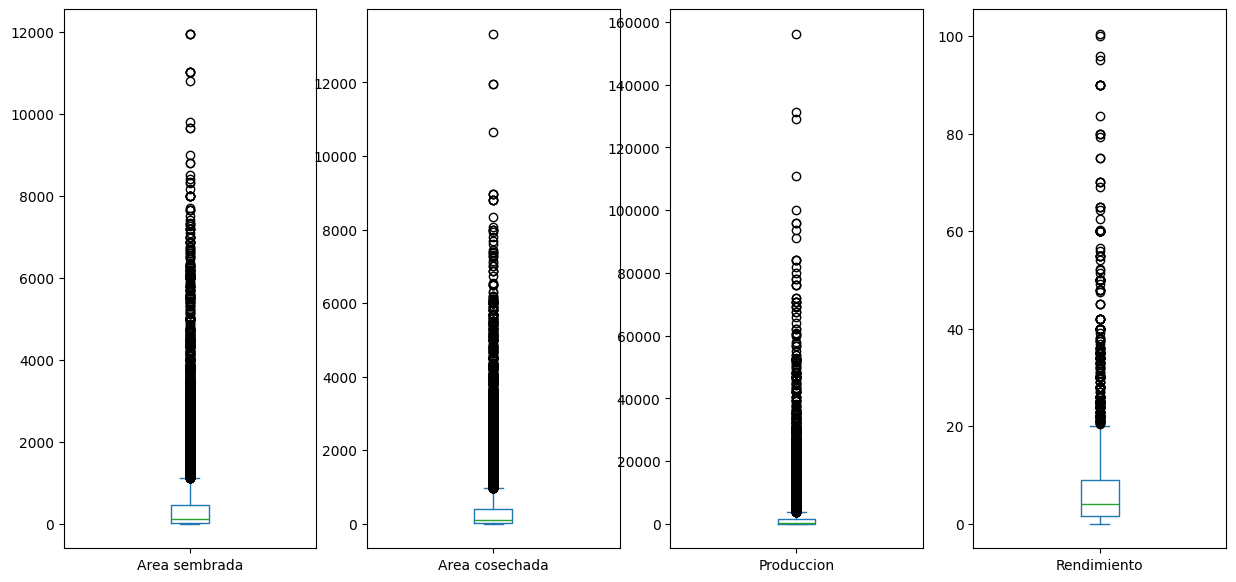

In [17]:
df.plot.box(subplots=True, figsize=(15,7))
plt.show()

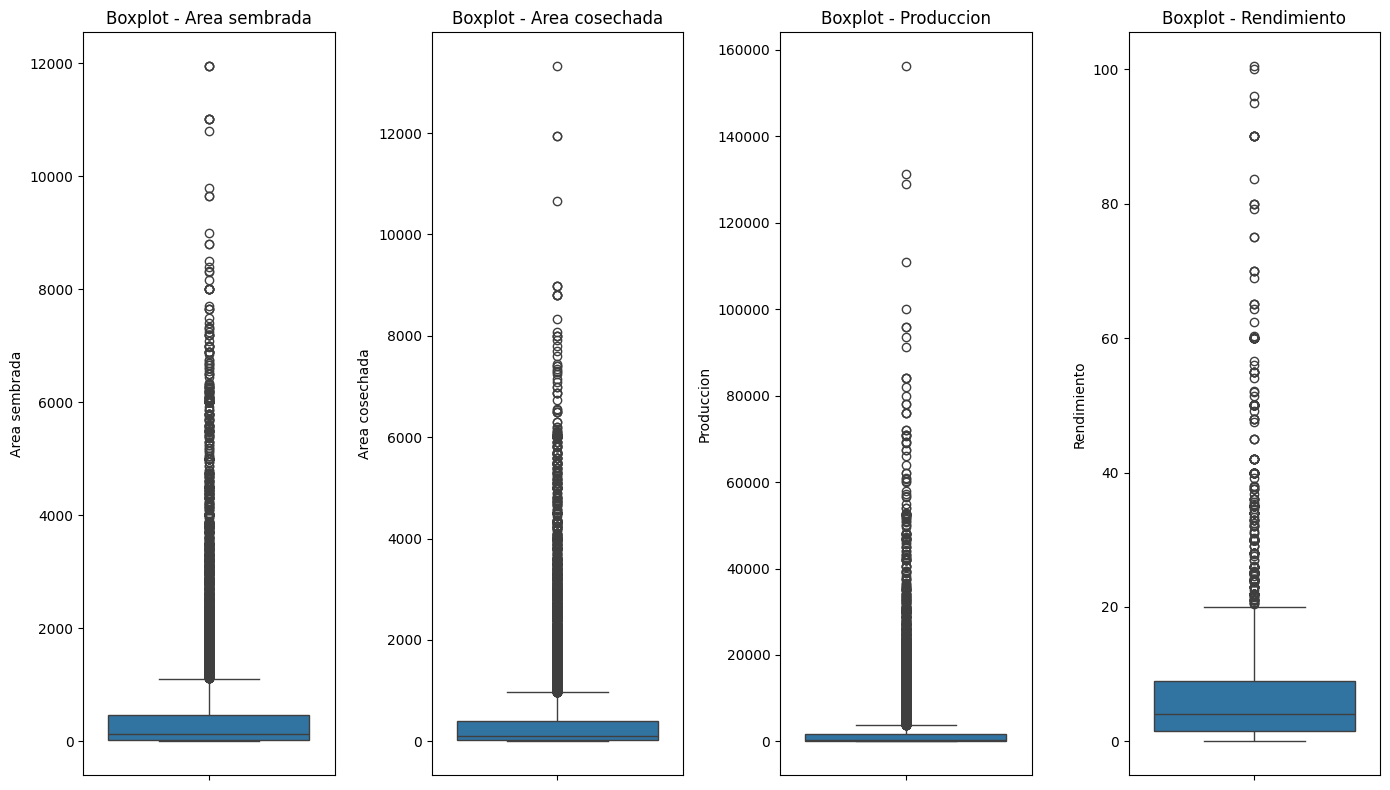

In [60]:
# Crear la figura y los subplots (1 fila, 4 columnas)
fig, axes = plt.subplots(1, 4, figsize=(14, 8))

# Boxplot para 'Area sembrada'
sns.boxplot(y=df['Area sembrada'], ax=axes[0])
axes[0].set_title('Boxplot - Area sembrada')

# Boxplot para 'Area cosechada'
sns.boxplot(y=df['Area cosechada'], ax=axes[1])
axes[1].set_title('Boxplot - Area cosechada')

# Boxplot para 'Produccion'
sns.boxplot(y=df['Produccion'], ax=axes[2])
axes[2].set_title('Boxplot - Produccion')

# Boxplot para 'Rendimiento'
sns.boxplot(y=df['Rendimiento'], ax=axes[3])
axes[3].set_title('Boxplot - Rendimiento')

# Ajustar el layout para evitar que se superpongan
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [52]:
df.columns

Index(['Indice', 'Codigo depto', 'Codigo mpio', 'Departamento', 'SUBREGION',
       'Municipio', 'Grupo cultivo', 'Subgrupo cultivo', 'Cultivo', 'Año',
       'Area sembrada', 'Area cosechada', 'Produccion', 'Rendimiento',
       'Ciclo'],
      dtype='object')

## Histográma y gráfico de densidad

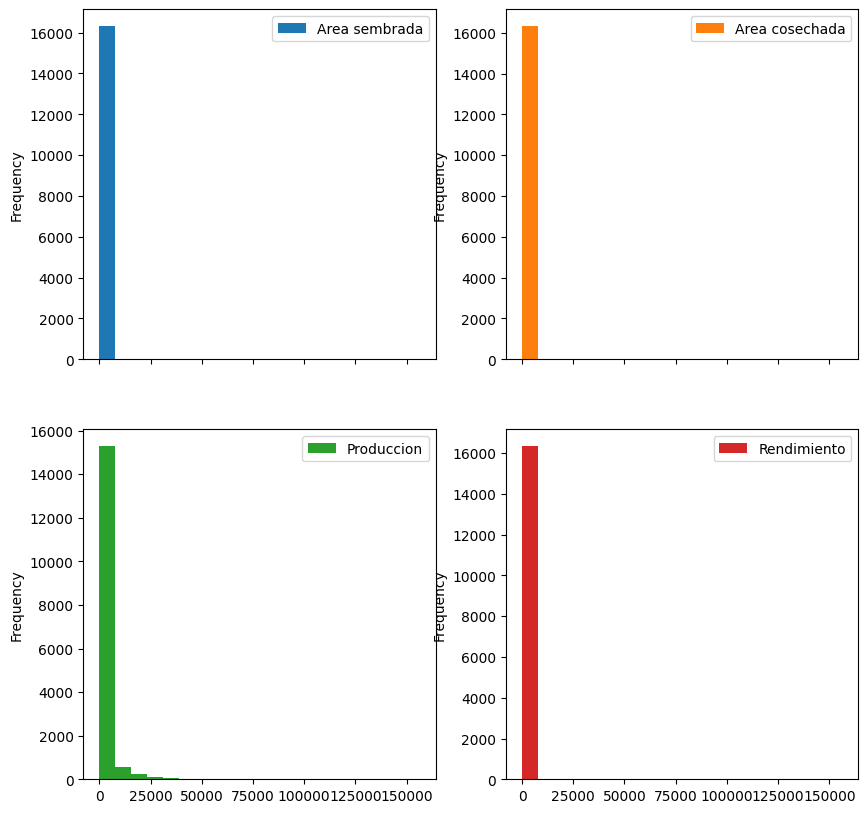

In [18]:
df.plot.hist(subplots=True, layout=(2,2), figsize=(10,10), bins=20)
plt.show()

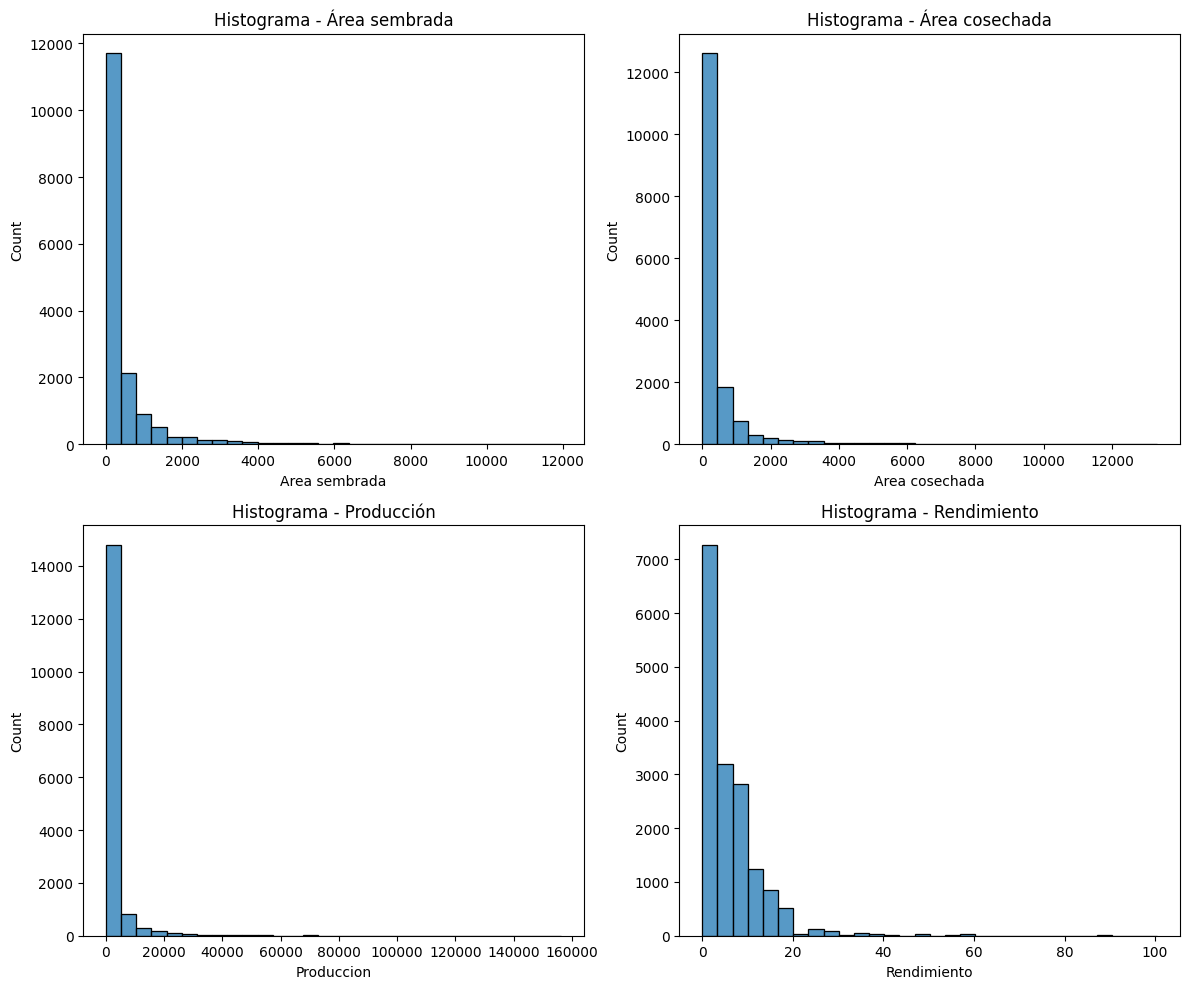

In [55]:
# Crear la figura y los subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograma para 'Área sembrada'
sns.histplot(df['Area sembrada'], bins=30, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histograma - Área sembrada')

# Histograma para 'Área cosechada'
sns.histplot(df['Area cosechada'], bins=30, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Histograma - Área cosechada')

# Histograma para 'Producción'
sns.histplot(df['Produccion'], bins=30, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Histograma - Producción')

# Histograma para 'Rendimiento'
sns.histplot(df['Rendimiento'], bins=30, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Histograma - Rendimiento')

# Ajustar el layout para evitar que se superpongan
plt.tight_layout()

# Mostrar los histogramas
plt.show()

In [19]:
fig = px.histogram(df, x='Area sembrada', nbins=20)
fig.show()

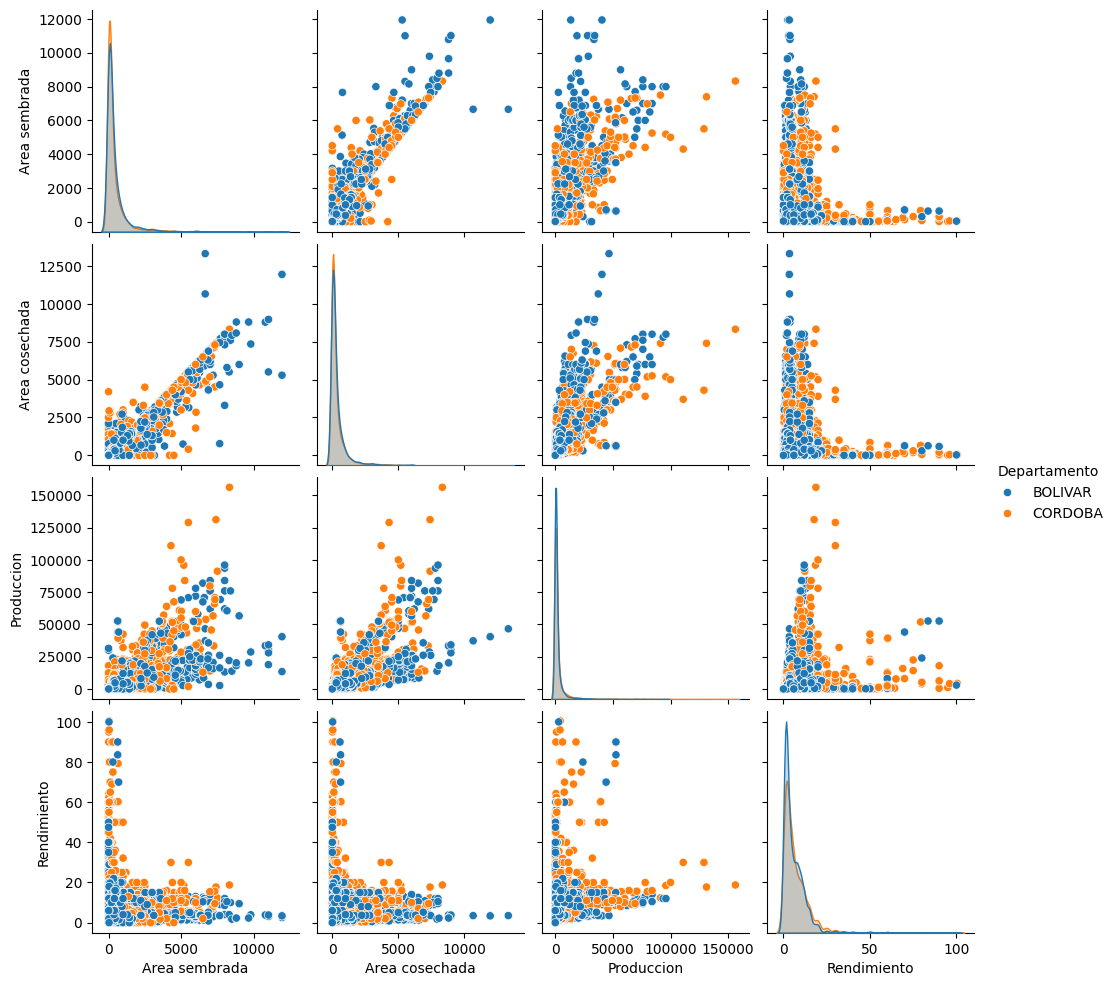

In [20]:
# Crear scatter plots para todas las combinaciones de variables numéricas
sns.pairplot(df, hue='Departamento')

# Mostrar los gráficos
plt.show()

Los gráficos de dispersión muestran muchos registros con 'Área sembrada'=0 y con 'Rendimiento' muy alto <br>
<br>
Mayormente en Córdoba

In [21]:
as0 = df[df['Area sembrada'] == 0]
as0.head()

,Indice,Codigo depto,Codigo mpio,Departamento,SUBREGION,Municipio,Grupo cultivo,Subgrupo cultivo,Cultivo,Año,Area sembrada,Area cosechada,Produccion,Rendimiento,Ciclo
10388,10388,13,13042,BOLIVAR,MAGDALENA MEDIO BOLIVARENSE,ARENAL,RAICES Y TUBERCULOS,RAICES Y TUBERCULOS,YUCA,2022,0.0,180.0,1080.0,6.0,TRANSITORIO
10466,10466,13,13062,BOLIVAR,DIQUE BOLIVARENSE,ARROYOHONDO,RAICES Y TUBERCULOS,RAICES Y TUBERCULOS,NAME,2022,0.0,68.0,340.0,5.0,TRANSITORIO
10468,10468,13,13062,BOLIVAR,DIQUE BOLIVARENSE,ARROYOHONDO,RAICES Y TUBERCULOS,RAICES Y TUBERCULOS,NAME,2023,0.0,70.0,350.0,5.0,TRANSITORIO
10475,10475,13,13062,BOLIVAR,DIQUE BOLIVARENSE,ARROYOHONDO,RAICES Y TUBERCULOS,RAICES Y TUBERCULOS,YUCA,2022,0.0,275.0,2200.0,8.0,TRANSITORIO
10477,10477,13,13062,BOLIVAR,DIQUE BOLIVARENSE,ARROYOHONDO,RAICES Y TUBERCULOS,RAICES Y TUBERCULOS,YUCA,2023,0.0,230.0,1840.0,8.0,TRANSITORIO


In [22]:
as0.shape[0]

205

In [23]:
as0[as0['Area cosechada'] == 0]
# ¿205 registros donde no hay Area sembrada pero si hay Area cosechada? Qué se hace con estos registros?

,Indice,Codigo depto,Codigo mpio,Departamento,SUBREGION,Municipio,Grupo cultivo,Subgrupo cultivo,Cultivo,Año,Area sembrada,Area cosechada,Produccion,Rendimiento,Ciclo


In [24]:
as0['Ciclo'].value_counts()
# ¿Alguna relación con cultivos transitorios?

Ciclo
TRANSITORIO    205
Name: count, dtype: int64

In [25]:
as0['Departamento'].value_counts()

Departamento
CORDOBA    135
BOLIVAR     70
Name: count, dtype: int64

# Normalización y Escalado de Datos

In [26]:
# 1. Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include='float64')

# 2. Normalizar las columnas numéricas
scaler_min_max = MinMaxScaler()
norm = pd.DataFrame(scaler_min_max.fit_transform(df_numeric), columns=df_numeric.columns)

# 3. Estandarizar las columnas numéricas
scaler_standard = StandardScaler()
est = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=df_numeric.columns)

# 1. Seleccionar las columnas categóricas o no numéricas
df_non_numeric = df.drop(columns=df_numeric.columns)

# 2. Combinar las columnas categóricas con las columnas numéricas normalizadas
df_normalized = pd.concat([df_non_numeric.reset_index(drop=True), norm.reset_index(drop=True)], axis=1)

# 3. Combinar las columnas categóricas con las columnas numéricas estandarizadas
df_standardized = pd.concat([df_non_numeric.reset_index(drop=True), est.reset_index(drop=True)], axis=1)

Text(0.5, 1.0, 'Valores estandarizados')

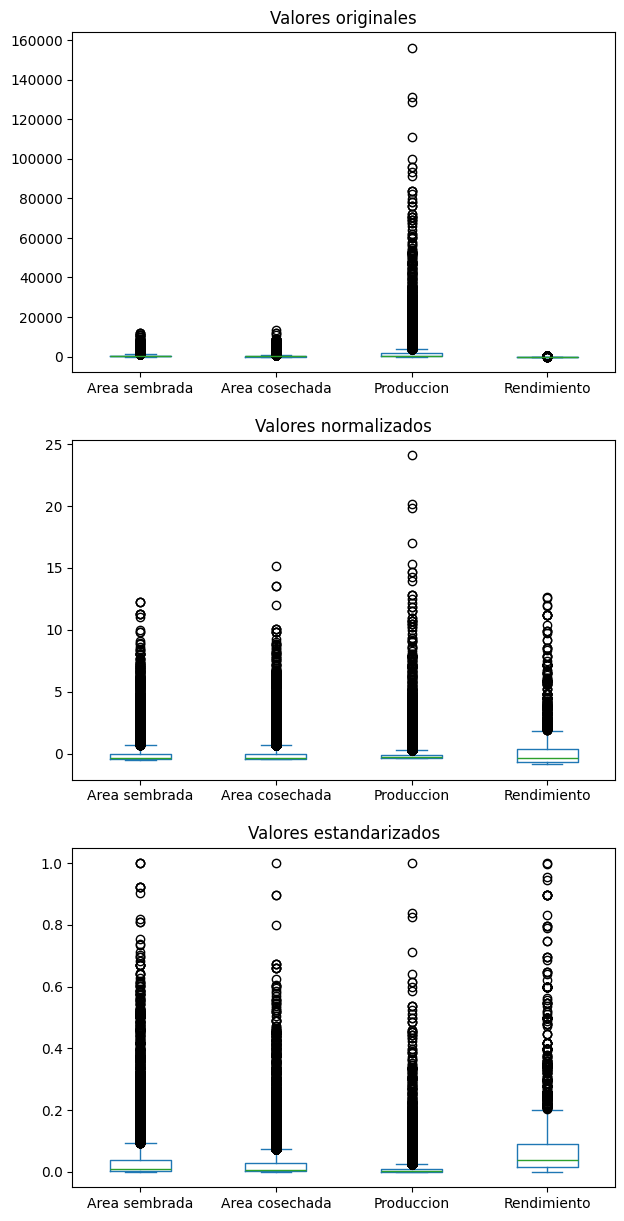

In [27]:
# Crear subplots para agrupar de 3 en 3
fig, axes = plt.subplots(3, 1, figsize=(7, 15))  # 3 filas, 1 columna

df.plot.box(ax=axes[0])
axes[0].set_title('Valores originales')
df_standardized.plot.box(ax=axes[1])
axes[1].set_title('Valores normalizados')
df_normalized.plot.box(ax=axes[2])
axes[2].set_title('Valores estandarizados')

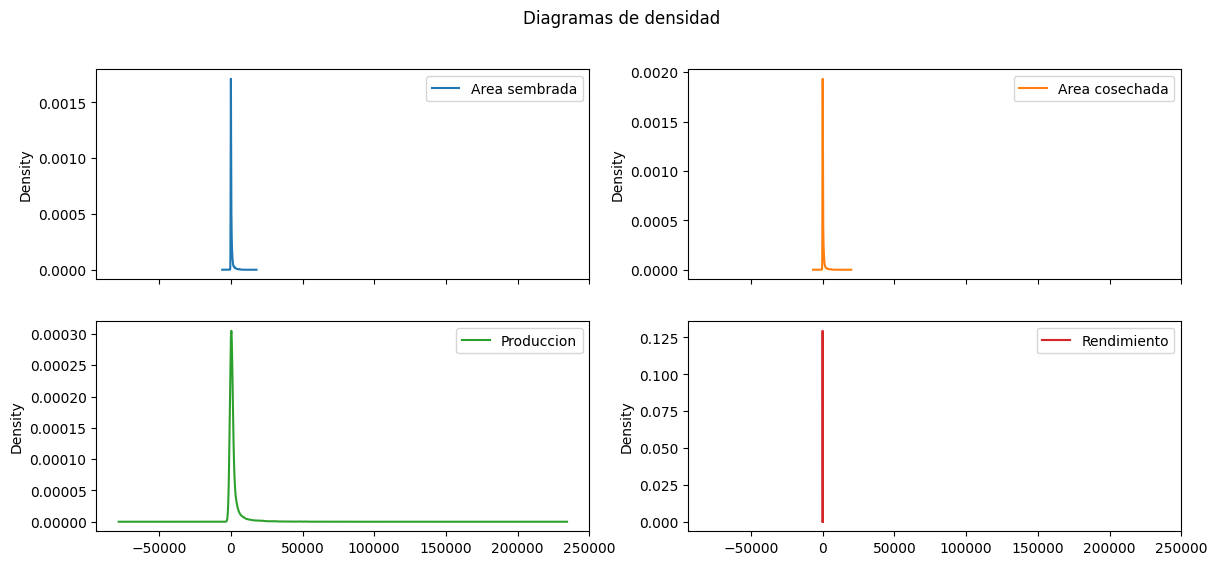

In [28]:
df.plot.kde(subplots=True, layout=(2,2), figsize=(14,6), title='Diagramas de densidad')
plt.show()

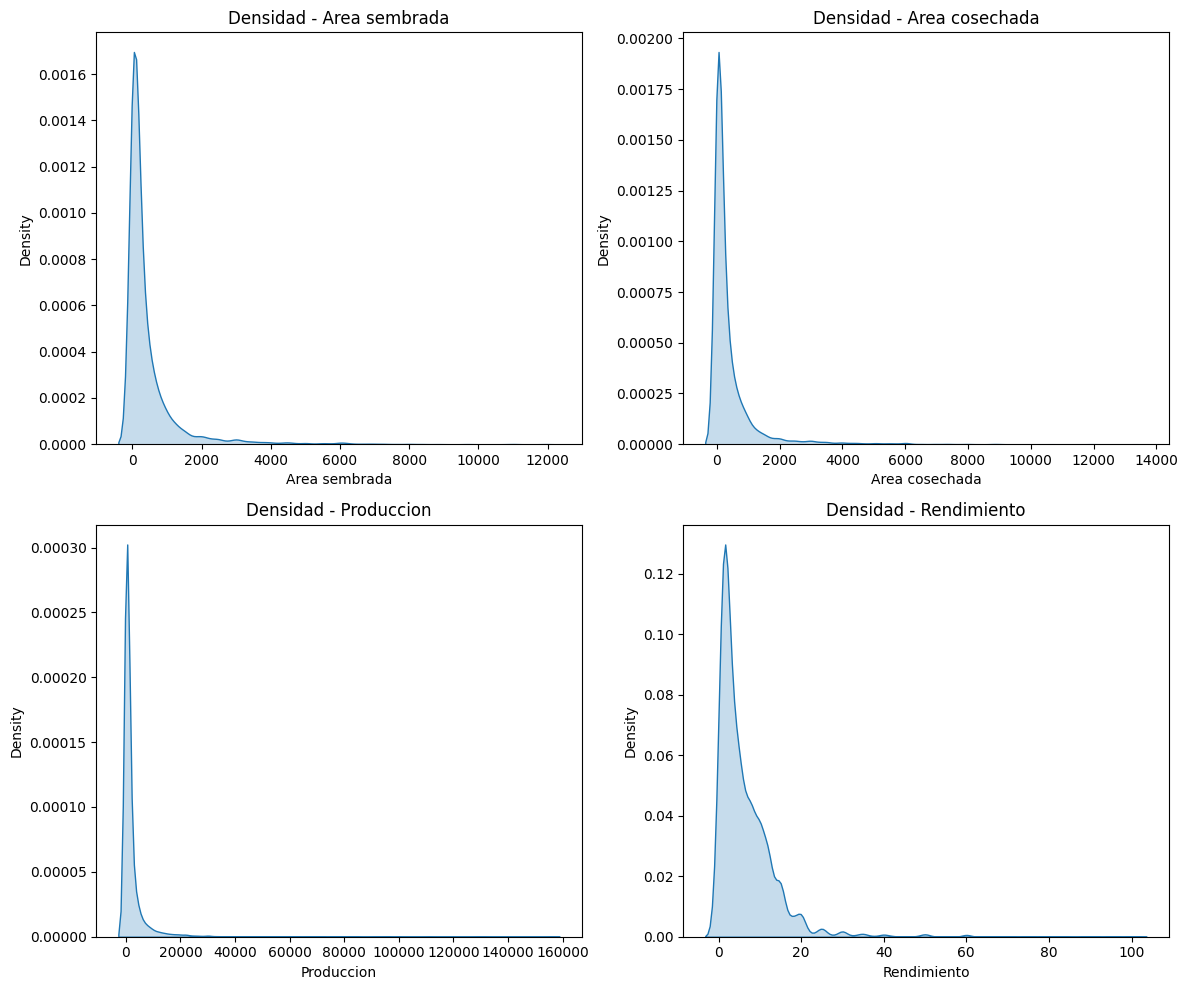

In [56]:
# Crear la figura y los subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Grafico de densidad para 'Area sembrada'
sns.kdeplot(df['Area sembrada'], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Densidad - Area sembrada')

# Grafico de densidad para 'Area cosechada'
sns.kdeplot(df['Area cosechada'], ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Densidad - Area cosechada')

# Grafico de densidad para 'Produccion'
sns.kdeplot(df['Produccion'], ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Densidad - Produccion')

# Grafico de densidad para 'Rendimiento'
sns.kdeplot(df['Rendimiento'], ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Densidad - Rendimiento')

# Ajustar el layout para evitar que se superpongan
plt.tight_layout()

# Mostrar los graficos de densidad
plt.show()

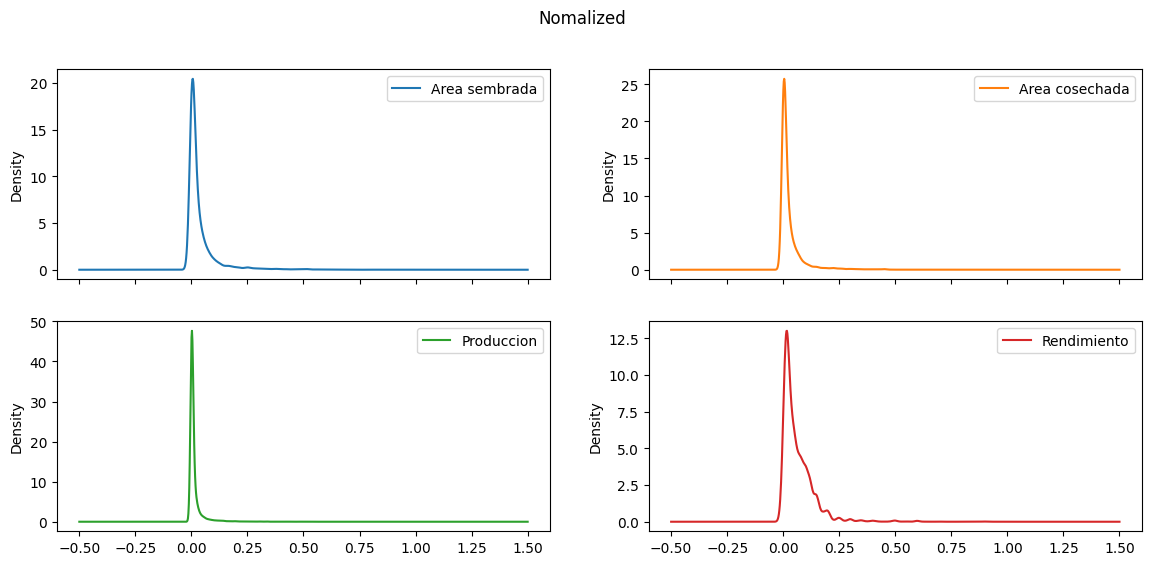

In [29]:
df_normalized.plot.kde(subplots=True, layout=(2,2), figsize=(14,6), title='Nomalized')
plt.show()

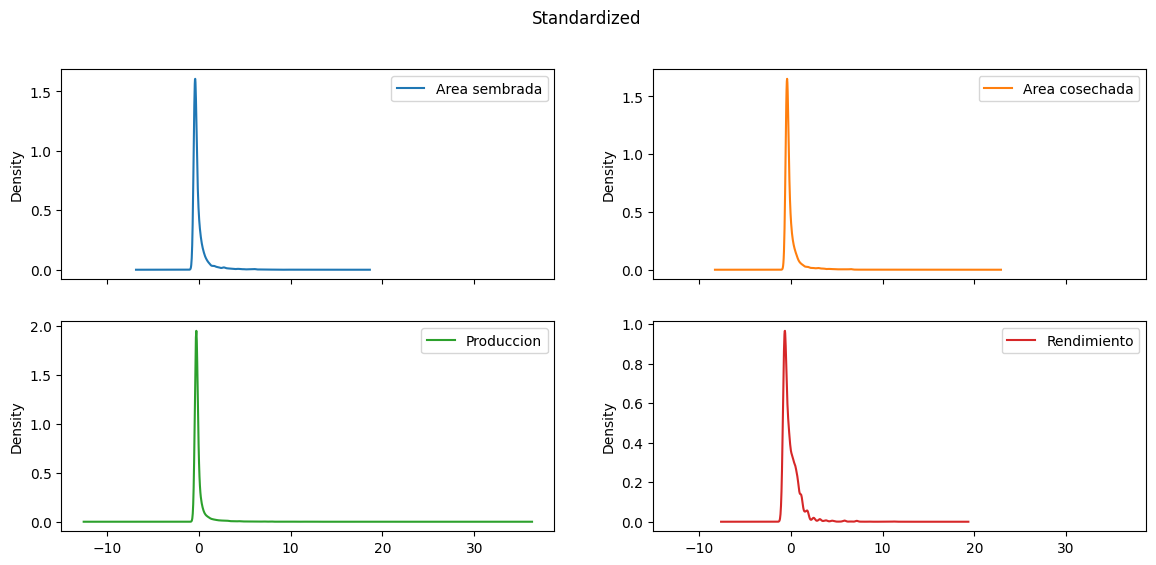

In [30]:
df_standardized.plot.kde(subplots=True, layout=(2,2), figsize=(14,6), title='Standardized')
plt.show()

# Gráficos Unidimensionales

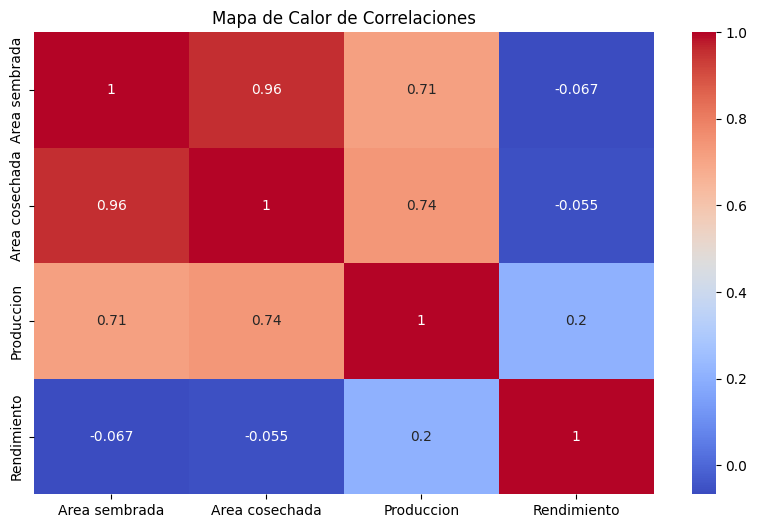

In [31]:
plt.figure(figsize=(10,6))
corr = df[['Area sembrada', 'Area cosechada', 'Produccion', 'Rendimiento']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

¿Cuál es el cultivo de mayor producción histórica por departamento?

In [32]:
df_cultivo = df.groupby(['Departamento', 'Cultivo'])[['Area sembrada', 'Area cosechada', 'Produccion']].sum().reset_index()

In [33]:
df_cultivo.loc[df_cultivo.groupby('Departamento')['Produccion'].idxmax()]

,Departamento,Cultivo,Area sembrada,Area cosechada,Produccion
54,BOLIVAR,YUCA,687026.86,586814.85,5731352.2
109,CORDOBA,YUCA,430992.80,380759.75,4790686.6


Suma anual de las variables cuantitativas

In [34]:
df_anual = df.groupby('Año',observed=False)[['Area sembrada', 'Area cosechada', 'Produccion']].sum().reset_index()
df_anual['Rendimiento'] = df_anual['Produccion']/df_anual['Area cosechada']
df_anual.head()
df_anual.describe()

,Area sembrada,Area cosechada,Produccion,Rendimiento
count,18.0000,18.000000,1.800000e+01,18.000000
mean,415453.9350,363784.704444,2.005139e+06,5.383282
std,80171.2372,73595.042125,5.241493e+05,0.868342
min,127586.0000,110445.000000,2.685680e+05,2.431690
25%,401270.8150,343243.250000,1.816591e+06,5.093436
50%,441190.0650,393237.435000,2.105852e+06,5.457500
75%,453964.2825,406111.500000,2.328526e+06,5.932745
max,491421.0000,440188.000000,2.640910e+06,6.393212


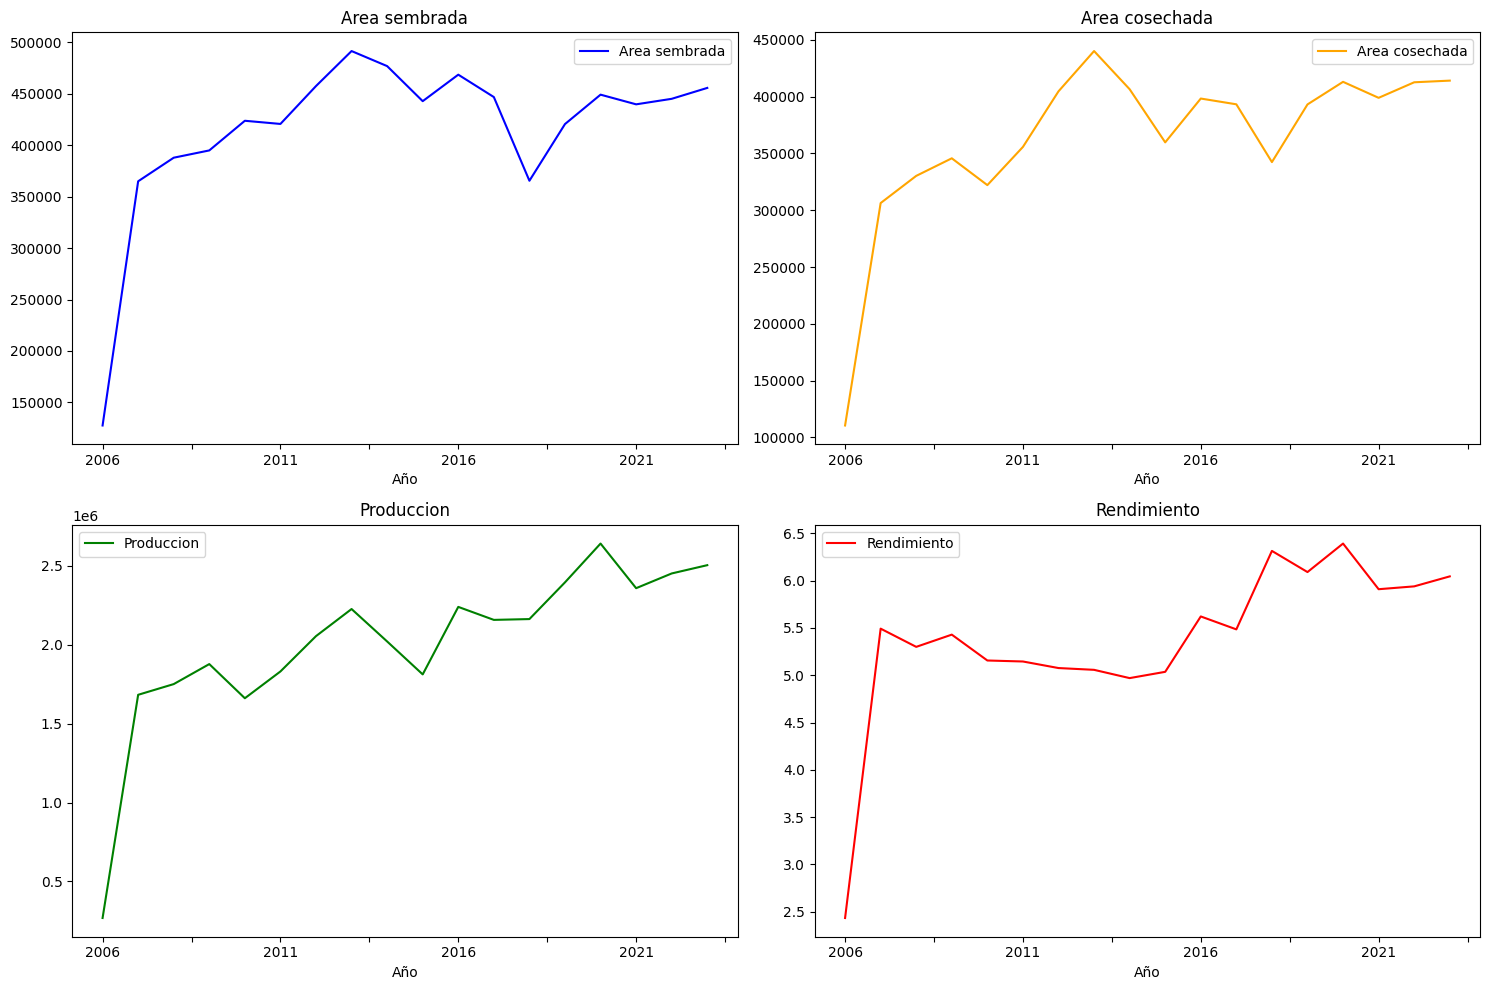

In [35]:
# Configurar los subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar
df_anual.plot.line(x='Año', y='Area sembrada', ax=axes[0,0], color='blue', title='Area sembrada')
df_anual.plot.line(x='Año', y='Area cosechada', ax=axes[0,1], color='orange', title='Area cosechada')
df_anual.plot.line(x='Año', y='Produccion', ax=axes[1,0], color='green', title='Produccion')
df_anual.plot.line(x='Año', y='Rendimiento', ax=axes[1,1], color='red', title='Rendimiento')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

plt.show()

In [36]:
df_dpto_anual = df.groupby(['Departamento','Año'],observed=False)[['Area sembrada', 'Area cosechada', 'Produccion']].sum().reset_index()
df_dpto_anual['Rendimiento'] = df_dpto_anual['Produccion']/df_dpto_anual['Area cosechada']

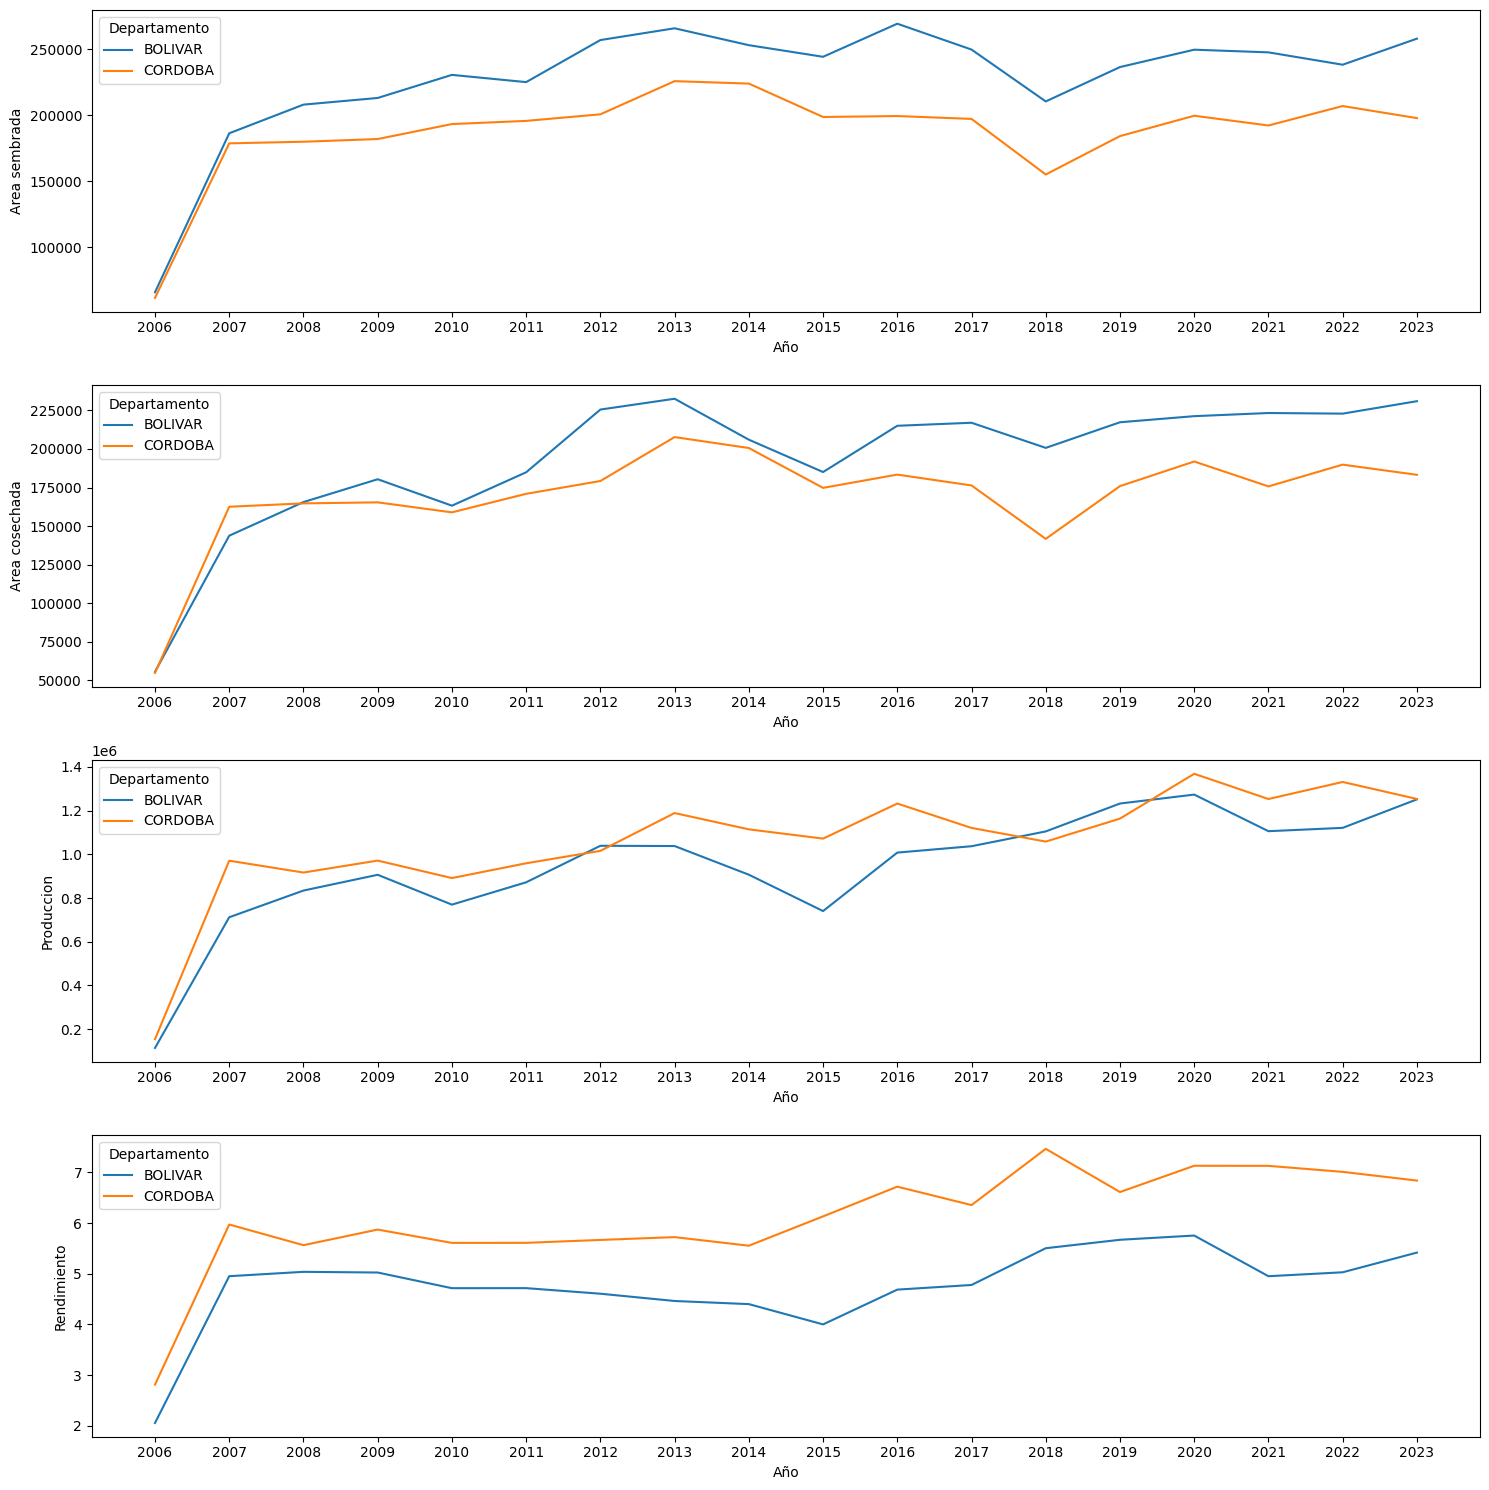

In [37]:
# Configurar los subplots 2x2
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

# Graficar
sns.lineplot(data=df_dpto_anual, x='Año', y='Area sembrada', ax=axes[0], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anual, x='Año', y='Area cosechada', ax=axes[1], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anual, x='Año', y='Produccion', ax=axes[2], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anual, x='Año', y='Rendimiento', ax=axes[3], hue='Departamento', palette='tab10')

# Ajustar las etiquetas del eje X
for ax in axes.flatten():
    ax.set_xticks(df_dpto_anual['Año'].unique()) 
    
# Ajustar el diseño para que no se superpongan
plt.tight_layout()

plt.show()

Promedio anual de las variables cuantitativas

In [38]:
df_anualm = df.groupby('Año',observed=False)[['Area sembrada', 'Area cosechada', 'Produccion']].mean().reset_index()
df_anualm['Rendimiento'] = df_anualm['Produccion']/df_anualm['Area cosechada']
df_anualm.head()
df_anualm.describe()

,Area sembrada,Area cosechada,Produccion,Rendimiento
count,18.000000,18.000000,18.000000,18.000000
mean,475.968606,414.829241,2208.585121,5.383282
std,80.842230,65.679053,421.291167,0.868342
min,327.215596,298.381174,1177.929825,2.431690
25%,426.779669,383.179963,2071.461456,5.093436
50%,496.301181,417.185595,2238.107176,5.457500
75%,532.538423,463.388213,2414.176338,5.932745
max,571.010778,518.018154,3271.493192,6.393212


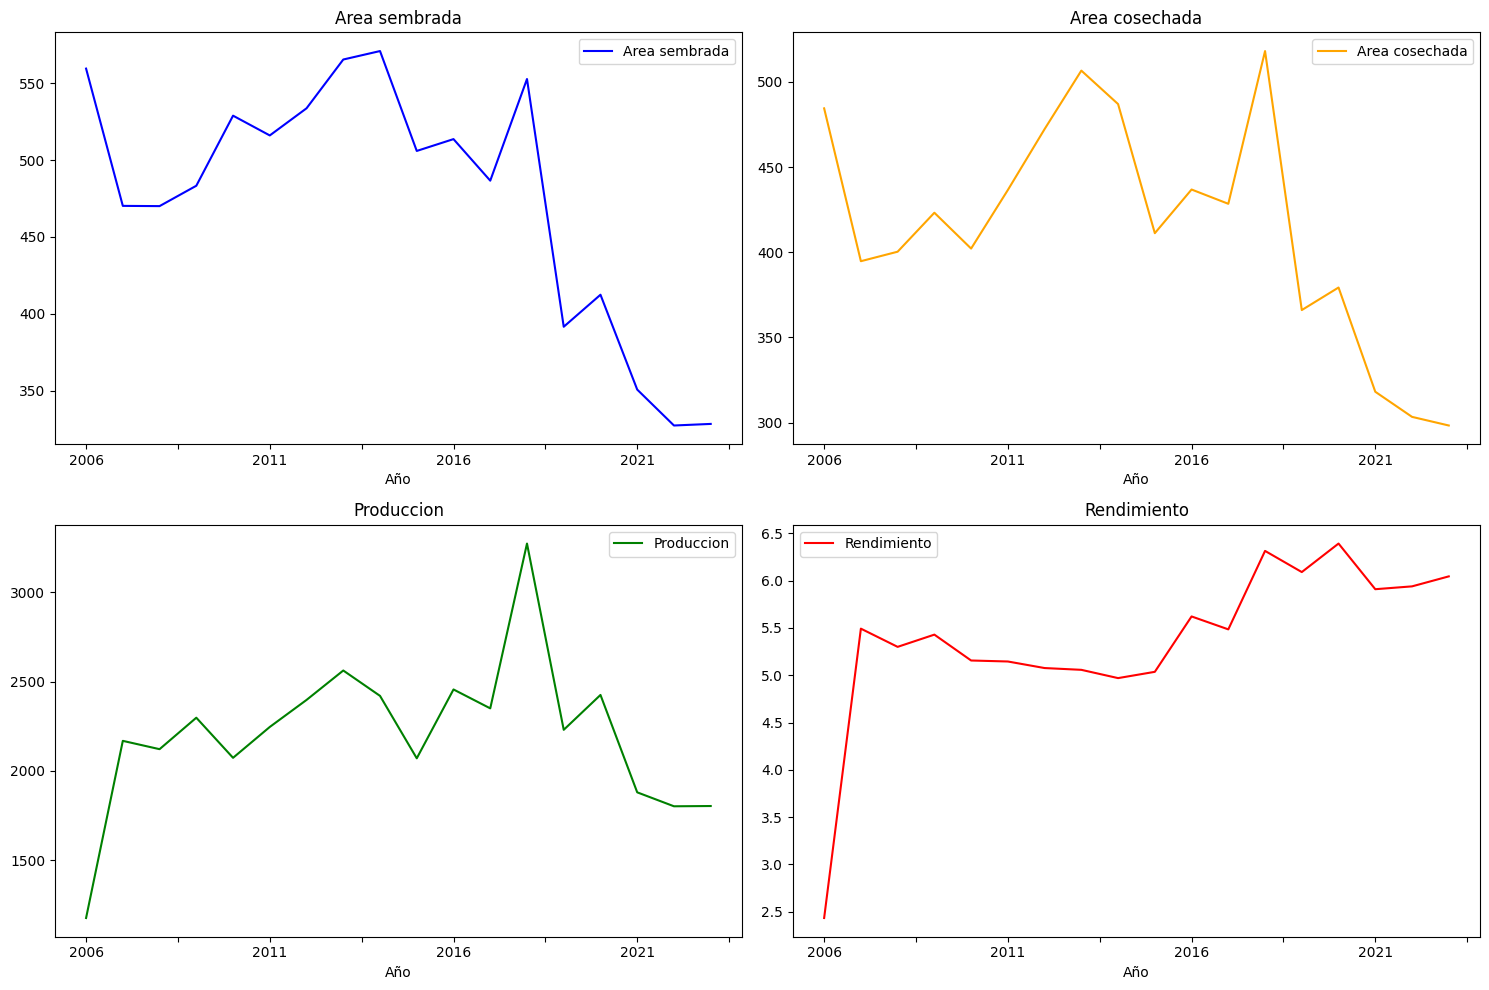

In [39]:
# Configurar los subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar
df_anualm.plot.line(x='Año', y='Area sembrada', ax=axes[0,0], color='blue', title='Area sembrada')
df_anualm.plot.line(x='Año', y='Area cosechada', ax=axes[0,1], color='orange', title='Area cosechada')
df_anualm.plot.line(x='Año', y='Produccion', ax=axes[1,0], color='green', title='Produccion')
df_anualm.plot.line(x='Año', y='Rendimiento', ax=axes[1,1], color='red', title='Rendimiento')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

plt.show()

In [40]:
df_dpto_anualm = df.groupby(['Departamento','Año'],observed=False)[['Area sembrada', 'Area cosechada', 'Produccion','Rendimiento']].mean().reset_index()
#df_dpto_anualm['Rendimiento'] = df_dpto_anualm['Produccion']/df_dpto_anualm['Area cosechada']
df_dpto_anualm.head()

,Departamento,Año,Area sembrada,Area cosechada,Produccion,Rendimiento
0,BOLIVAR,2006,686.708333,578.979167,1190.104167,2.325937
1,BOLIVAR,2007,508.871585,392.849727,1945.368852,4.729836
2,BOLIVAR,2008,538.707254,428.898964,2160.816062,4.924896
3,BOLIVAR,2009,536.458438,454.299748,2282.574307,5.118942
4,BOLIVAR,2010,587.890306,416.410714,1963.507653,4.586913


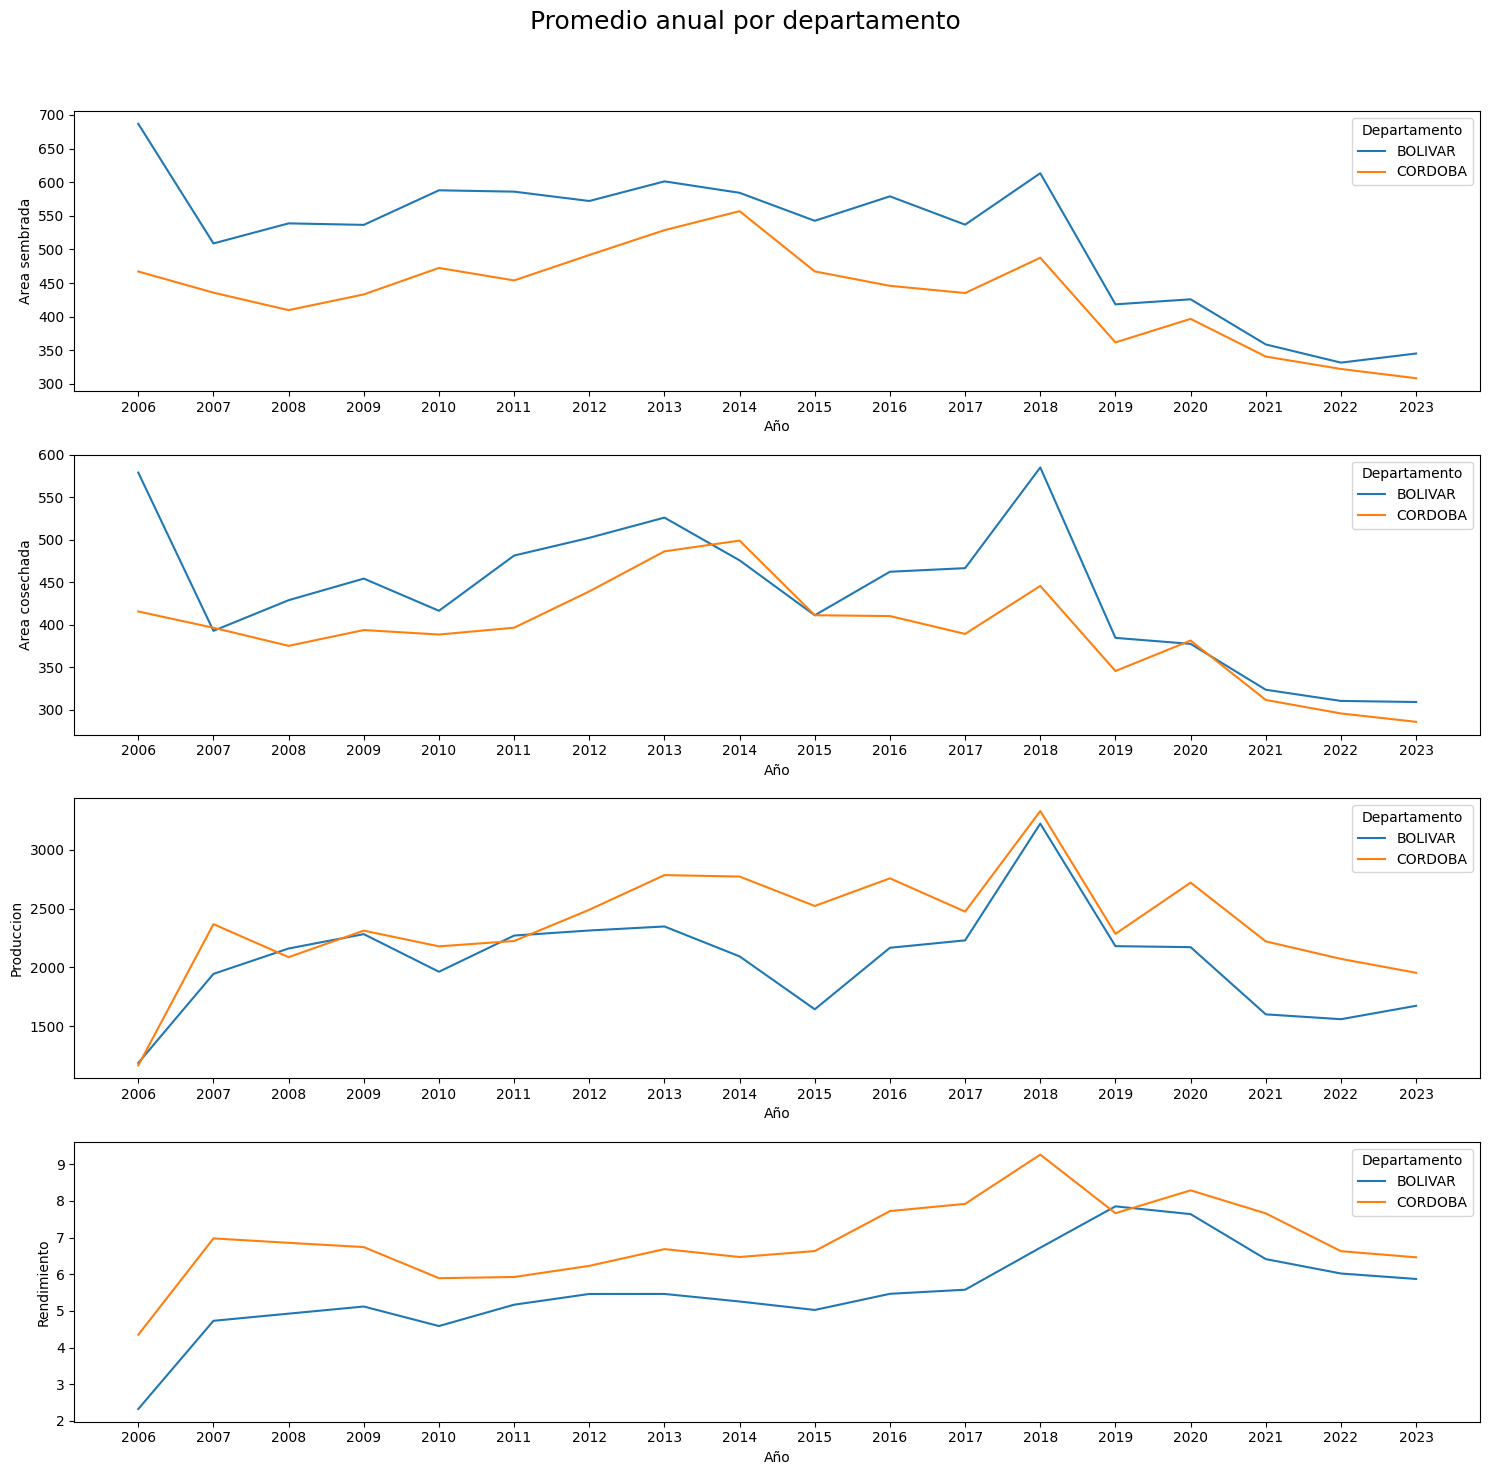

In [ ]:
df_dpto_anualm = df.groupby(['Departamento','Año'],observed=False)[['Area sembrada', 'Area cosechada', 'Produccion','Rendimiento']].mean().reset_index()

# Configurar los subplots 2x2
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

# Graficar
sns.lineplot(data=df_dpto_anualm, x='Año', y='Area sembrada', ax=axes[0], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anualm, x='Año', y='Area cosechada', ax=axes[1], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anualm, x='Año', y='Produccion', ax=axes[2], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anualm, x='Año', y='Rendimiento', ax=axes[3], hue='Departamento', palette='tab10')

# Ajustar las etiquetas del eje X
for ax in axes.flatten():
    ax.set_xticks(df_dpto_anualm['Año'].unique()) 
    
# Añadir el título a la figura completa
fig.suptitle('Promedio anual por departamento', fontsize=18)

# Ajustar el diseño para que no se superpongan
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Dejar espacio para el título

plt.show()

Grupo de cultivo por Departamento

In [42]:
fig = px.histogram(df, x='Grupo cultivo', color= 'Departamento',title='Grupo de cultivo por Departamento')
fig.show()

# Regresión lineal simple

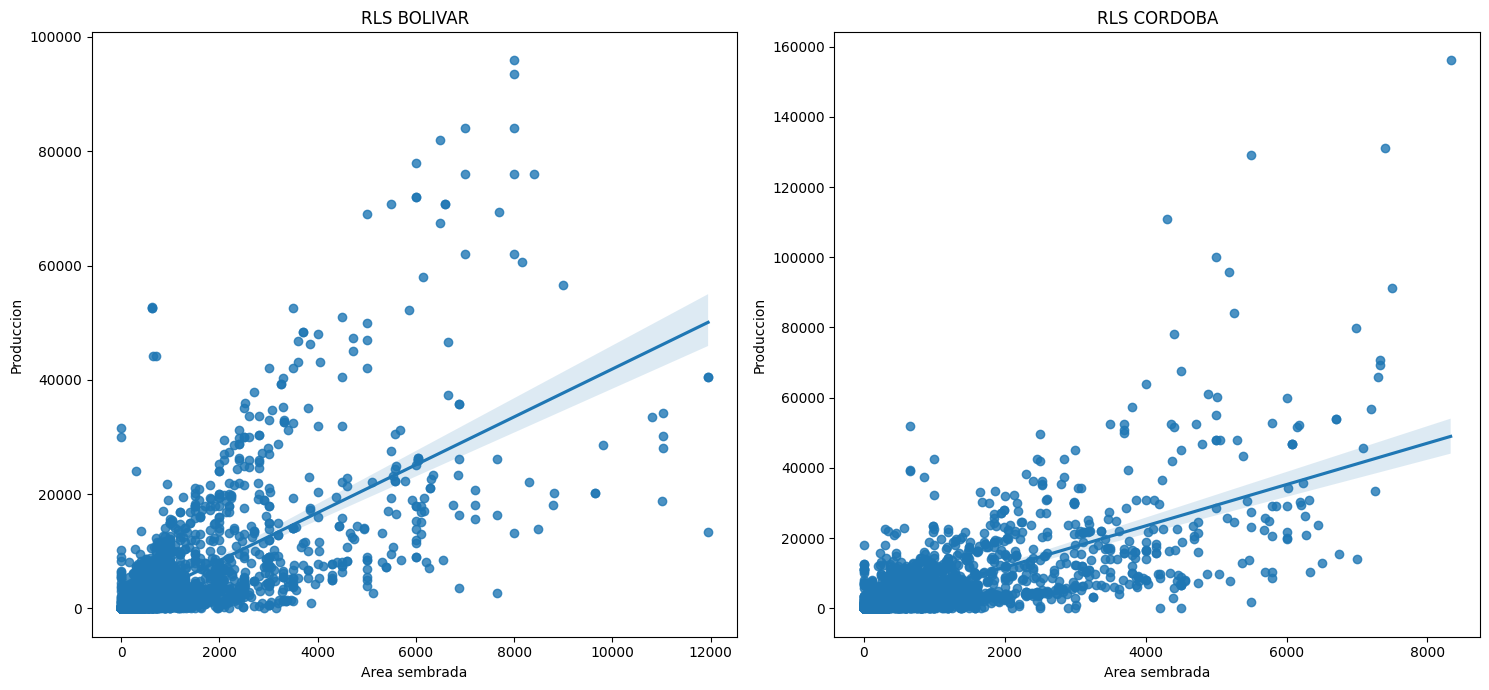

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Gráfico para BOLIVAR
sns.regplot(x='Area sembrada', y='Produccion', data=df[df['Departamento'] == 'BOLIVAR'], ax=axes[0])
axes[0].set_title('RLS BOLIVAR')

# Gráfico para CORDOBA
sns.regplot(x='Area sembrada', y='Produccion', data=df[df['Departamento'] == 'CORDOBA'], ax=axes[1])
axes[1].set_title('RLS CORDOBA')

plt.tight_layout()
plt.show()

In [44]:
# Preparar los datos en conjunto de entrenamiento y prueba

# Filtrar los datos para el Departamento de BOLIVAR
data_bolivar = df[df['Departamento'] == 'BOLIVAR']

# Asignar las variables
X = data_bolivar[['Area sembrada']]  # Variable independiente (Area sembrada)
y = data_bolivar['Produccion']       # Variable dependiente (Produccion)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.47298778299884403


In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 18292800.56624099


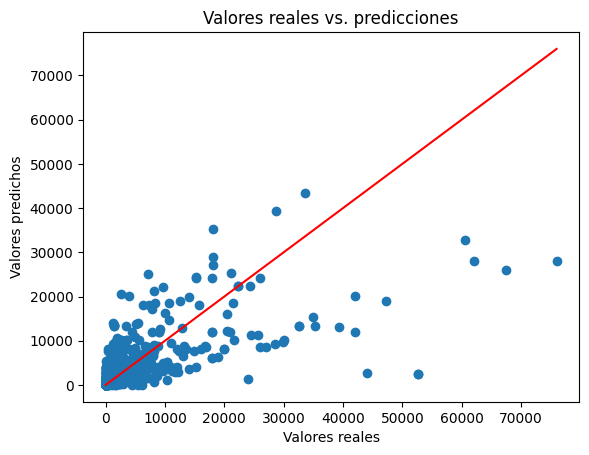

In [49]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de referencia 1:1
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. predicciones')
plt.show()

In [50]:
print(model.coef_)  # Coeficientes de las variables independientes
print(model.intercept_)  # Intercepto (valor cuando X = 0)

[4.0069319]
56.02936220997344


In [51]:
# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = data_bolivar[['Area sembrada', 'Produccion']].corr(method='pearson')
correlation_matrix

,Area sembrada,Produccion
Area sembrada,1.000000,0.709979
Produccion,0.709979,1.000000
